In [1]:
# Import python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Combine all csv files data and display top results

df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df4 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df5 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df.head() 

/Users/jiaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,NaN,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [4]:
# Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800631 entries, 0 to 52202
Data columns (total 11 columns):
block                  800631 non-null object
flat_model             800631 non-null object
flat_type              800631 non-null object
floor_area_sqm         800631 non-null float64
lease_commence_date    800631 non-null int64
month                  800631 non-null object
remaining_lease        91577 non-null object
resale_price           800631 non-null float64
storey_range           800631 non-null object
street_name            800631 non-null object
town                   800631 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 73.3+ MB


In [5]:
# Observe the number of NA values in each column
df.isna().sum()

block                       0
flat_model                  0
flat_type                   0
floor_area_sqm              0
lease_commence_date         0
month                       0
remaining_lease        709054
resale_price                0
storey_range                0
street_name                 0
town                        0
dtype: int64

In [16]:
df_new = df.dropna()

In [17]:
# Check how many observations are without NA values
len(df_new)

91577

In [18]:
# Get first 5 observations without NA values
df_new.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,174,Improved,3 ROOM,60.0,1986,2015-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO
1,541,New Generation,3 ROOM,68.0,1981,2015-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
2,163,New Generation,3 ROOM,69.0,1980,2015-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
3,446,New Generation,3 ROOM,68.0,1979,2015-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
4,557,New Generation,3 ROOM,68.0,1980,2015-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO


In [19]:
df_new['remaining_lease'].value_counts()

68                    2328
67                    1857
69                    1635
71                    1547
84                    1423
70                    1337
81                    1335
80                    1317
85                    1314
83                    1312
72                    1190
86                    1168
61                    1166
82                    1140
62                    1068
63                    1042
79                    1029
95                    1026
60                     876
87                     866
66                     842
76                     820
64                     726
75                     622
78                     615
59                     577
77                     554
58                     532
65                     527
94                     523
                      ... 
47 years 11 months      10
47 years 05 months      10
48 years 04 months       9
48 years 02 months       9
88 years                 9
47 years 03 months       9
4

In [49]:
# Replacing all the categories that are in terms of "years and months" to "years"
df_new['remaining_lease'] = df_new['remaining_lease'].str[:2]
df_new['remaining_lease'].value_counts()
# list(df_new.loc[:, df_new['remaining_lease'].dtypes == object])

/Users/jiaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


66    2769
65    2630
94    2472
95    2161
67    2025
82    1911
79    1873
78    1854
83    1831
68    1823
81    1818
69    1806
93    1711
80    1573
64    1563
77    1519
84    1472
60    1356
70    1246
59    1245
61    1148
85    1148
58    1121
76    1078
92     975
74     968
73     942
57     872
62     863
75     769
56     768
63     767
55     657
86     586
91     536
54     486
71     446
72     444
90     391
87     377
89     343
50     333
51     320
52     290
88     289
53     261
48     200
49     189
47     108
46      48
96      43
Name: remaining_lease, dtype: int64

In [50]:
df.groupby(['remaining_lease'])['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
remaining_lease,,,,,,,,
48,1.0,250000.000000,NaN,250000.0,250000.0,250000.00,250000.0,250000.0
49,88.0,294986.090909,68146.350967,190000.0,250000.0,281500.00,320750.0,635000.0
50,138.0,286397.101449,63126.473609,200000.0,250000.0,275000.00,315000.0,860000.0
51,152.0,311039.394737,112975.199841,211000.0,265000.0,287500.00,320000.0,980000.0
52,243.0,310562.353909,71736.894544,200000.0,268000.0,302000.00,335000.0,815000.0
53,270.0,311646.411111,60607.454694,192000.0,265000.0,303944.00,350000.0,585000.0
54,207.0,320520.140097,98069.495016,200000.0,269250.0,305000.00,348000.0,1150000.0
55,181.0,359259.076685,124511.179822,233000.0,275000.0,315000.00,385000.0,845888.0
56,296.0,376027.972973,144698.220221,220000.0,282750.0,325000.00,410000.0,1060000.0


/Users/jiaer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


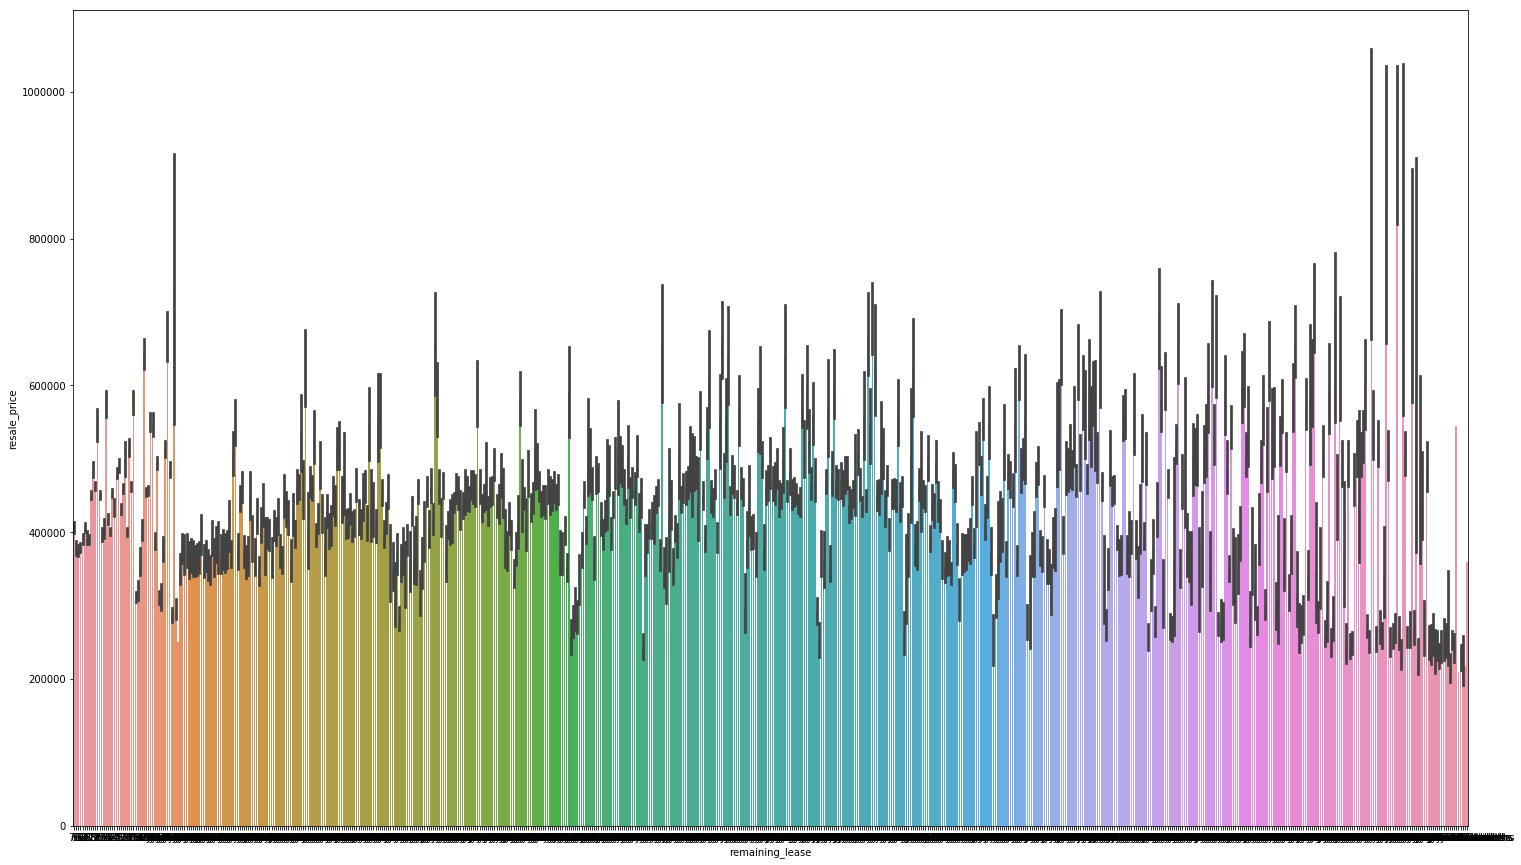

In [37]:
# Plot the bar graph for remaining_lease against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(x = 'remaining_lease', y = "resale_price", data = df)
plt.show()

In [38]:
df['month'].value_counts()

1999-03    6468
1999-06    5862
1998-10    5709
1999-04    5698
1999-05    5671
1999-07    5493
1999-08    5209
1998-11    4993
1998-12    4988
1999-02    4834
1999-01    4802
1998-09    4760
1998-08    4444
1998-07    4397
1998-06    4053
1998-04    3905
1999-09    3796
1999-10    3783
1998-05    3729
1998-03    3695
2010-07    3679
2010-06    3517
1996-10    3501
2001-10    3490
1998-02    3490
2009-10    3432
2001-07    3398
2002-01    3385
1999-11    3358
2001-11    3349
           ... 
1993-01    1142
1992-05    1140
1993-02    1138
1992-03    1113
1993-03    1113
2014-01    1098
1990-11    1090
2017-02    1080
1990-08    1078
2018-01    1072
1992-04    1067
1992-06    1059
1993-04    1055
1991-12    1050
1990-04    1047
1990-12    1020
2013-12    1008
2014-02     959
1992-02     954
1991-05     945
1990-02     931
1991-04     920
2013-02     886
1990-09     865
1991-03     854
1991-06     836
1990-06     824
1991-02     816
1990-10     810
1990-05     778
Name: month, Length: 355

In [39]:
df.groupby(['month'])['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1990-01,1507.0,65214.120770,42044.732879,6000.0,38450.0,50000.00,80000.0,238000.0
1990-02,931.0,67871.052632,41736.089385,7300.0,40000.0,53000.00,88000.0,233000.0
1990-03,1150.0,66603.433913,40908.150215,5600.0,40000.0,52000.00,85000.0,230000.0
1990-04,1047.0,65930.152818,39577.411718,7000.0,40000.0,50000.00,85000.0,238000.0
1990-05,778.0,67837.128535,43919.170733,6000.0,40000.0,51250.00,86000.0,250000.0
1990-06,824.0,66789.563107,42571.194741,7000.0,40000.0,50000.00,85125.0,237000.0
1990-07,1405.0,68974.898221,43398.781636,5000.0,40000.0,53000.00,88500.0,260000.0
1990-08,1078.0,68606.354360,44944.505352,7300.0,40000.0,52000.00,86000.0,267000.0
1990-09,865.0,69951.491329,43814.060895,8500.0,40000.0,56700.00,88000.0,235000.0


/Users/jiaer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


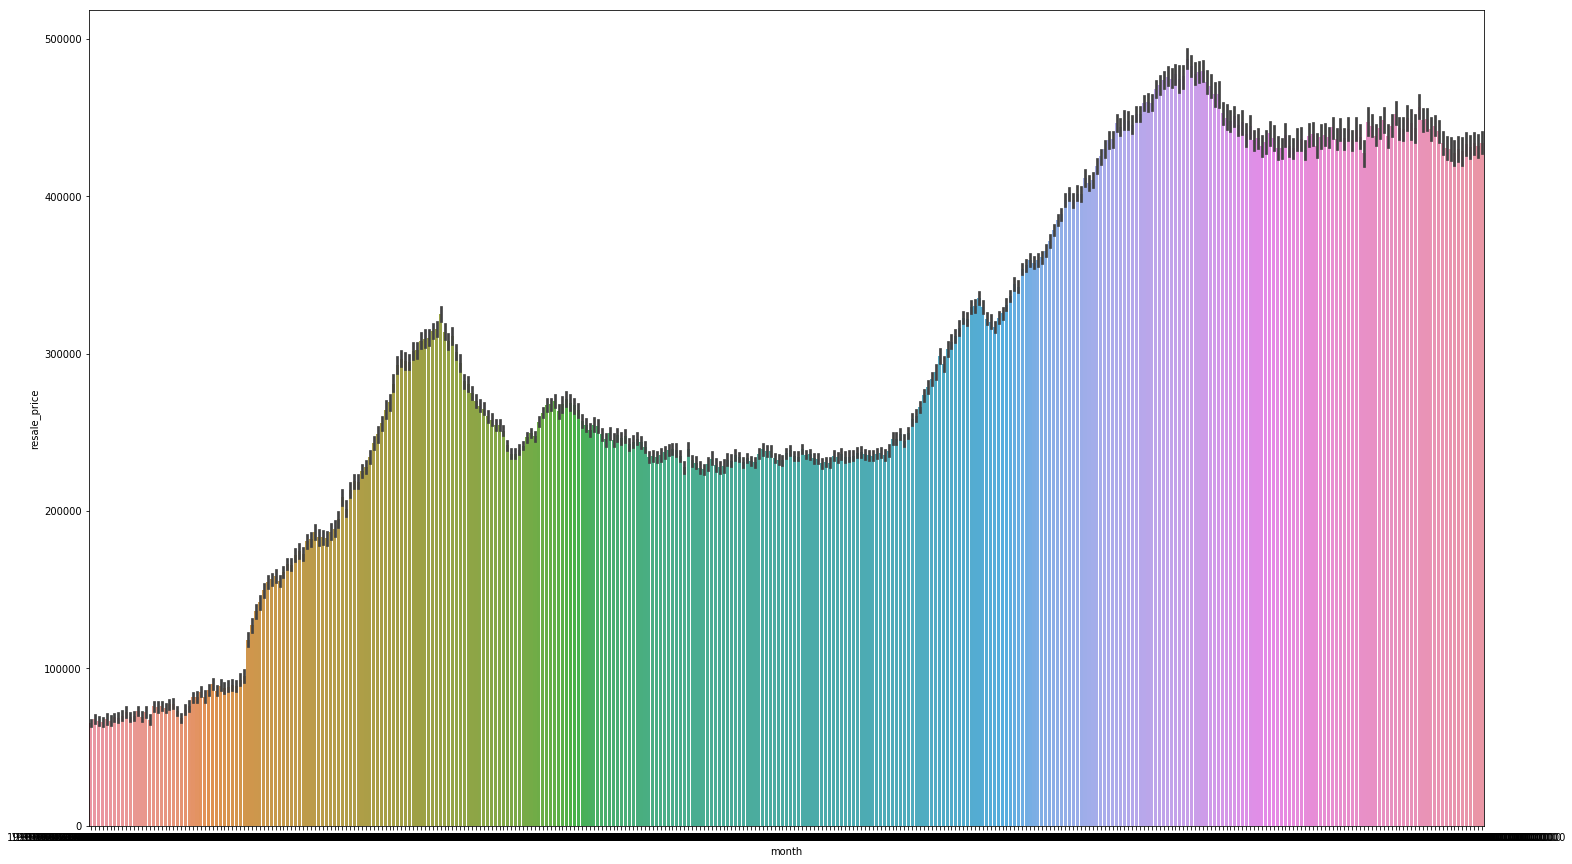

In [47]:
# Plot the bar graph for month against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(x = 'month', y = "resale_price", data = df)
plt.show()

In general, the resale prices increases as time passes. 

/Users/jiaer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


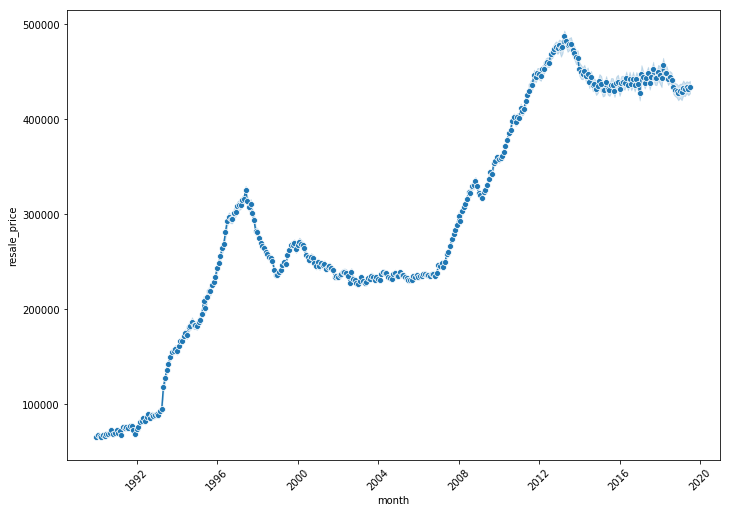

In [51]:
# Plot the line graph for month against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=df, x='month', y='resale_price', marker='o')
plt.xticks(rotation=45)
plt.show()

* The resale price reaches the highest at around year 2013.
* The resale price has been increasing from 1990 to 1997 and then again from 2008 to 2013.
* Resale price was steady from 2000 to 2008.